In [3]:
#preperaing and cleaning the data to get the game of Egypt and Comgo DR round 16th of the 2023 african cup.
from mplsoccer import Sbopen
parser = Sbopen()
competition = parser.competition()
competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             71 non-null     int64 
 1   season_id                  71 non-null     int64 
 2   country_name               71 non-null     object
 3   competition_name           71 non-null     object
 4   competition_gender         71 non-null     object
 5   competition_youth          71 non-null     bool  
 6   competition_international  71 non-null     bool  
 7   season_name                71 non-null     object
 8   match_updated              71 non-null     object
 9   match_updated_360          54 non-null     object
 10  match_available_360        8 non-null      object
 11  match_available            71 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 5.8+ KB


In [4]:
egypt_match = parser.match(competition_id=1267, season_id=107)
egypt_match.info()
df_lineup = parser.lineup(3922240)
df_lineup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         52 non-null     int64         
 1   match_date                       52 non-null     datetime64[ns]
 2   kick_off                         52 non-null     datetime64[ns]
 3   home_score                       52 non-null     int64         
 4   away_score                       52 non-null     int64         
 5   match_status                     52 non-null     object        
 6   match_status_360                 52 non-null     object        
 7   last_updated                     52 non-null     datetime64[ns]
 8   last_updated_360                 0 non-null      datetime64[ns]
 9   match_week                       52 non-null     int64         
 10  competition_id                   52 non-null     int64         


In [5]:
EGYvsCongo, df_related, df_freeze, df_tactics = parser.event(3922240)
EGYvsCongo = parser.event(3922240)[0]
EGYvsCongo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3789 non-null   object 
 1   index                           3789 non-null   int64  
 2   period                          3789 non-null   int64  
 3   timestamp                       3789 non-null   object 
 4   minute                          3789 non-null   int64  
 5   second                          3789 non-null   int64  
 6   possession                      3789 non-null   int64  
 7   duration                        2817 non-null   float64
 8   match_id                        3789 non-null   int64  
 9   type_id                         3789 non-null   int64  
 10  type_name                       3789 non-null   object 
 11  possession_team_id              3789 non-null   int64  
 12  possession_team_name            37

In [6]:
# Update specific position names to 'DF' for defenders and Fw to all the attakers and the ect
defender_positions = ['Left Back', 'Right Back', 'Right Center Back', 'Left Center Back']
for position in defender_positions:
    EGYvsCongo.loc[EGYvsCongo['position_name'] == position, 'position_name'] = 'DF'

midfield_positions = [ 'Right Midfield' , 'Left Midfield','Center Defensive Midfield' ,'Center Attacking Midfield' ,'Right Defensive Midfield'   ,'Left Defensive Midfield', 'Left Center Midfield', 'Right Center Midfield']  # Update this list as needed
for position in midfield_positions:
    EGYvsCongo.loc[EGYvsCongo['position_name'] == position, 'position_name'] = 'MF'
forward_positions = ['Center Forward', 'Left Wing', 'Right Wing']  
for position in forward_positions:
    EGYvsCongo.loc[EGYvsCongo['position_name'] == position, 'position_name'] = 'FW'
print(EGYvsCongo[['player_name', 'position_name']].head())  

   player_name position_name
0          NaN           NaN
1          NaN           NaN
2          NaN           NaN
3          NaN           NaN
4  Ahmed Sayed            FW


In [7]:
import numpy as np
import matplotlib.pyplot as plt




EGYvsCongo = EGYvsCongo.loc[EGYvsCongo["minute"] > 0]
EGYvsCongo = EGYvsCongo.reset_index(drop = True)
EGYvsCongo = EGYvsCongo.fillna(0)
X = EGYvsCongo.iloc[:, :11].select_dtypes(include=[np.number])

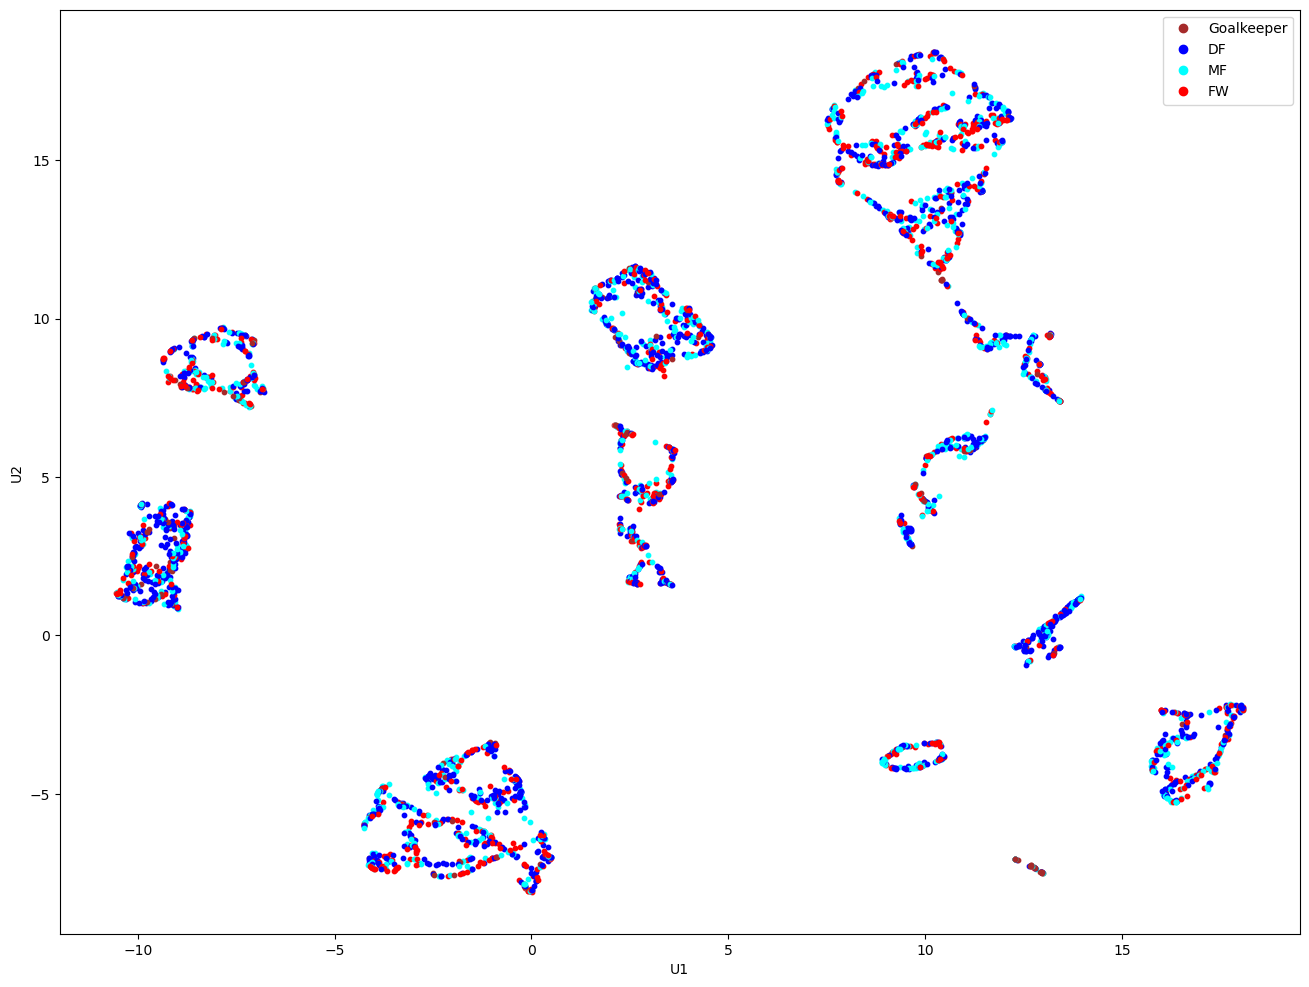

In [8]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler
#scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#dim reduction
reducer = UMAP(random_state = 2213)
comps = reducer.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize = (16,12))
#map position to color
colors = {"Goalkeeper": "brown", "DF": "blue", "MF": "aqua", "FW": "Red"}
color_list = EGYvsCongo['position_name'].map(colors).to_list()

for i in range(X.shape[0]):
    ax.scatter(comps[i,0], comps[i,1], c = color_list[i], s = 10)
ax.set_xlabel('U1')
ax.set_ylabel('U2')


#make legend
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
ax.legend(markers, colors.keys(), numpoints=1)
plt.show()

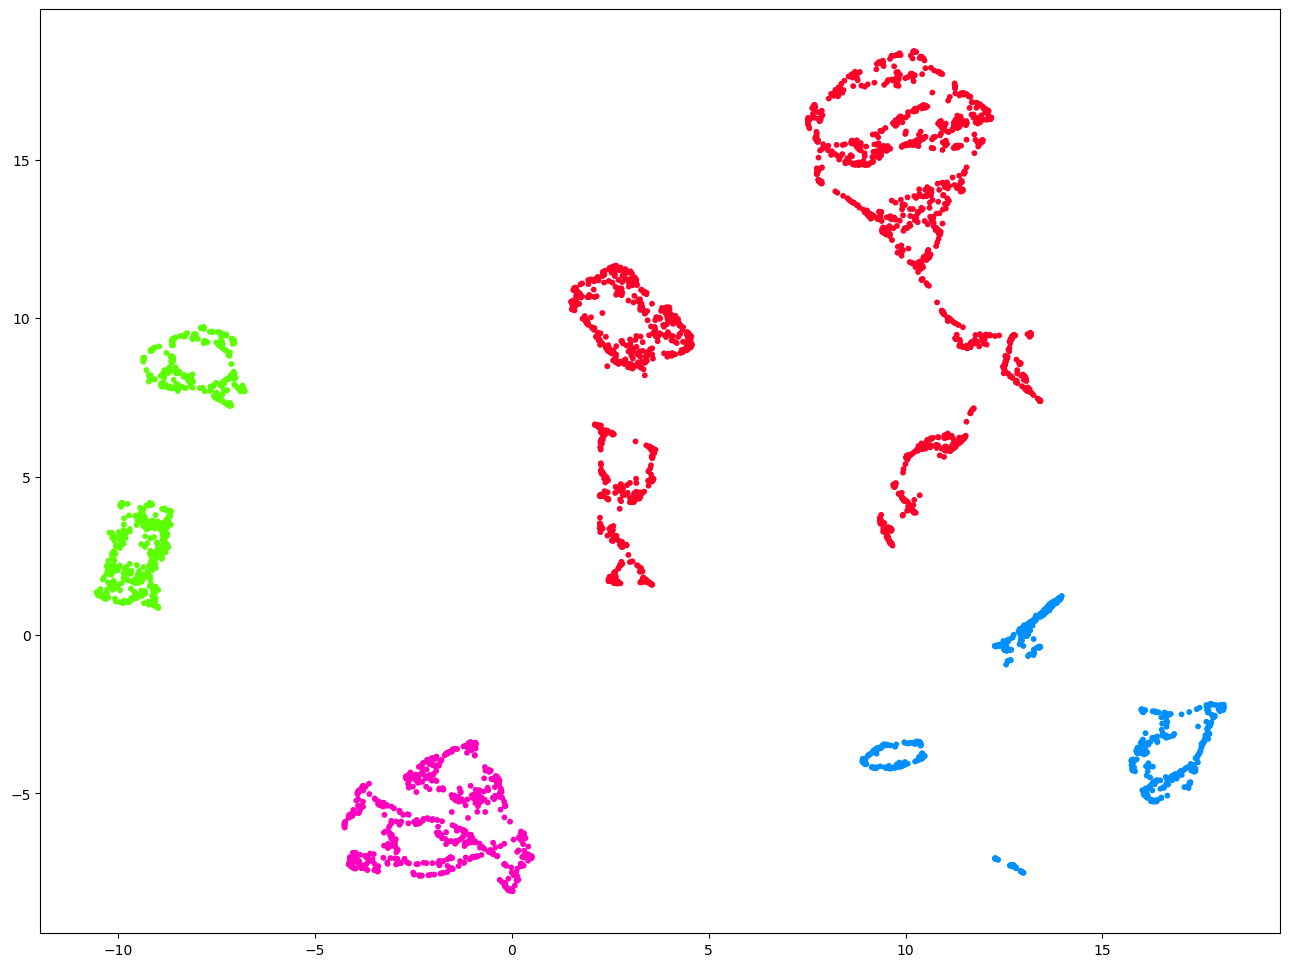

In [9]:
from sklearn.cluster import AgglomerativeClustering
#declare object
scan = AgglomerativeClustering(n_clusters=4)


#make predictions
labels = scan.fit_predict(comps)
fig, ax = plt.subplots(figsize = (16,12))
ax.scatter(comps[:, 0], comps[:, 1], c=labels, s=10, cmap='gist_rainbow');
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_17592\3747944555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  see["label"] = labels


      minute                        player_name position_name  label
1422      50     Mohamed Hany Gamal Eldemerdash            DF      0
1623      56   Ahmed Elsayed Ali Elsayed Hegazy            DF      0
133        4                     Charles Pickel            MF      1
445       13  Théo Bongonda Mbul''Ofeko Batombo            MF      3
361       11   Ahmed Elsayed Ali Elsayed Hegazy            DF      1
917       28             Chancel Mbemba Mangulu            DF      3
3631     122                 Simon Bokote Banza            FW      2
797       25       Mohamed Naser Elsayed Elneny            MF      1
277        8     Mohamed Hany Gamal Eldemerdash            DF      3
3160     108            Gedeon Kalulu Kyatengwa            DF      2


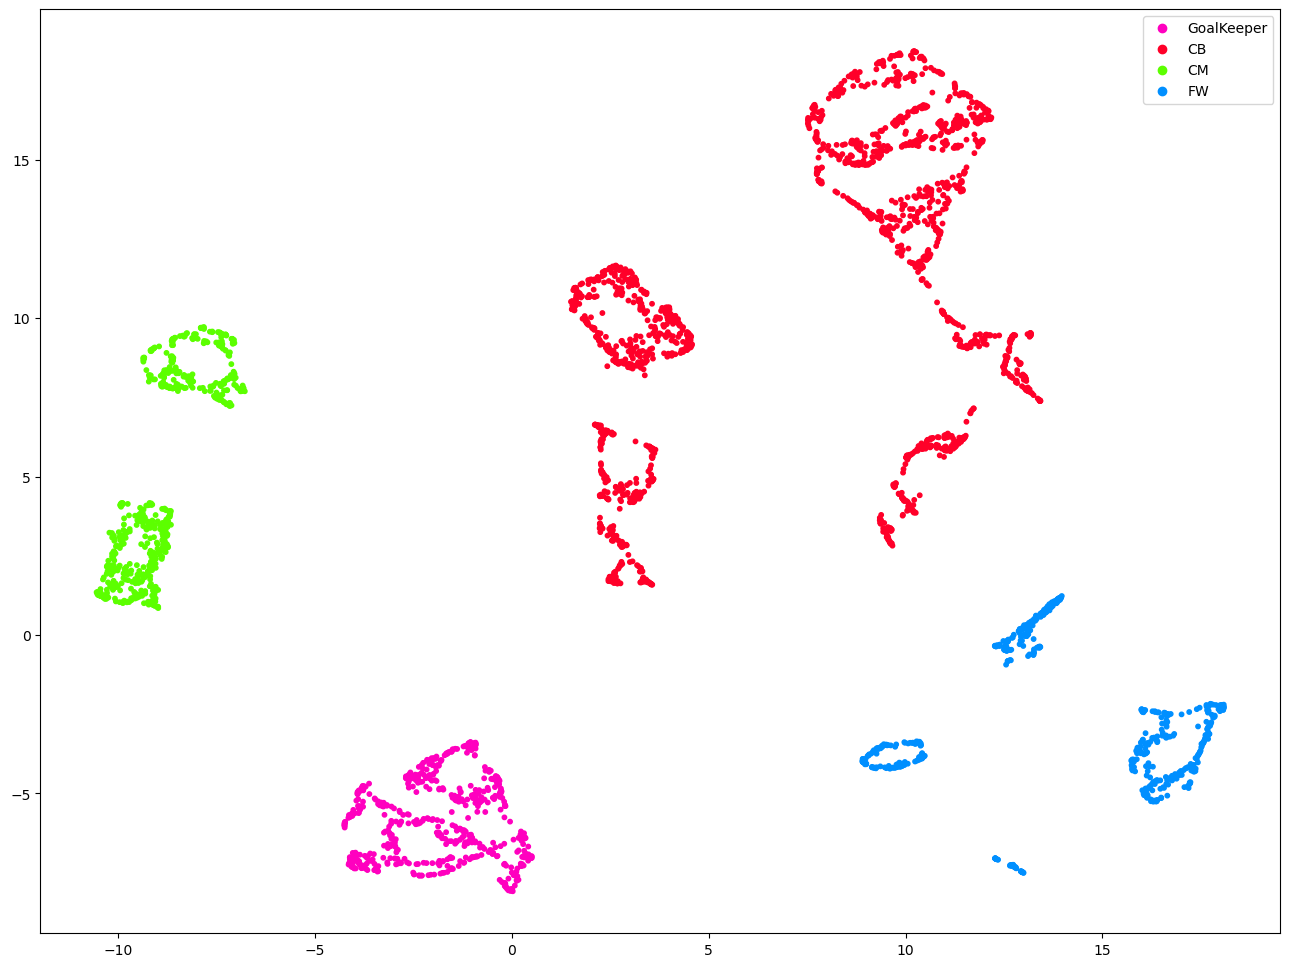

In [10]:
see = EGYvsCongo[['minute', 'player_name', 'position_name']]
see["label"] = labels
print(see.sample(frac = 1).head(10))

fig, ax = plt.subplots(figsize = (16,12))
scatter = ax.scatter(comps[:, 0], comps[:, 1], c=labels, s=10, cmap='gist_rainbow');
handles = scatter.legend_elements()[0]

myorder = [3,0,1,2]
handles = [handles[i] for i in myorder]
#add legend
ax.legend(handles=handles, labels = ["GoalKeeper", "CB", "CM", "FW"])
plt.show()